In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/both'
output_dir = '/content/drive/MyDrive/mean1_both'

num_patients = 33
num_events = 20

os.makedirs(output_dir, exist_ok=True)

# Loop for each patient
for patient_id in range(1, num_patients + 1):
    merged_data = []

    for event_id in range(1, num_events + 1):
        file_name = f'pilot{patient_id}_evnt{event_id}_session1_filtered.csv'
        file_path = os.path.join(base_dir, file_name)

        if os.path.exists(file_path):
            event_data = pd.read_csv(file_path, header=None)
            merged_data.append(event_data)
        else:
            print(f"File not found: {file_path}")

    if merged_data:
        if all(df.shape == merged_data[0].shape for df in merged_data):
            data_stack = np.array([df.values for df in merged_data])
            mean_values = np.mean(data_stack, axis=0)

            mean_dataframe = pd.DataFrame(mean_values)
            output_path = os.path.join(output_dir, f'pilot{patient_id}_mean_values.csv')
            mean_dataframe.to_csv(output_path, index=False, header=False)

            print(f"Mean values CSV saved for patient {patient_id} to {output_path}")
        else:
            print(f"Error: DataFrames for patient {patient_id} do not have consistent shapes.")
    else:
        print(f"No data available for patient {patient_id}.")

Mounted at /content/drive
Mean values CSV saved for patient 1 to /content/drive/MyDrive/mean_both/pilot1_mean_values.csv
Mean values CSV saved for patient 2 to /content/drive/MyDrive/mean_both/pilot2_mean_values.csv
Mean values CSV saved for patient 3 to /content/drive/MyDrive/mean_both/pilot3_mean_values.csv
Mean values CSV saved for patient 4 to /content/drive/MyDrive/mean_both/pilot4_mean_values.csv
Mean values CSV saved for patient 5 to /content/drive/MyDrive/mean_both/pilot5_mean_values.csv
Mean values CSV saved for patient 6 to /content/drive/MyDrive/mean_both/pilot6_mean_values.csv
Mean values CSV saved for patient 7 to /content/drive/MyDrive/mean_both/pilot7_mean_values.csv
Mean values CSV saved for patient 8 to /content/drive/MyDrive/mean_both/pilot8_mean_values.csv
Mean values CSV saved for patient 9 to /content/drive/MyDrive/mean_both/pilot9_mean_values.csv
Mean values CSV saved for patient 10 to /content/drive/MyDrive/mean_both/pilot10_mean_values.csv
Mean values CSV saved 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/both'
output_dir = '/content/drive/MyDrive/mean1_both'

patient_files = [f for f in os.listdir(output_dir) if f.endswith('_mean_values.csv')]

for file_name in patient_files:
    file_path = os.path.join(output_dir, file_name)

    patient_id = file_name.split('_')[0].replace('pilot', '')

    data = pd.read_csv(file_path, header=None)

    for index, row in data.iterrows():
        signal = row.values  # Extract row as a signal

        plt.figure(figsize=(12, 6))
        plt.plot(signal, label=f'Patient {patient_id} Row {index + 1} Signal')
        plt.title(f'Signal for Patient {patient_id} - Row {index + 1}')
        plt.xlabel('Columns as time steps')
        plt.ylabel('Signal Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the patient ID (e.g., 1 for pilot1): 10
Enter the channel name to plot (e.g., Fp1): F5


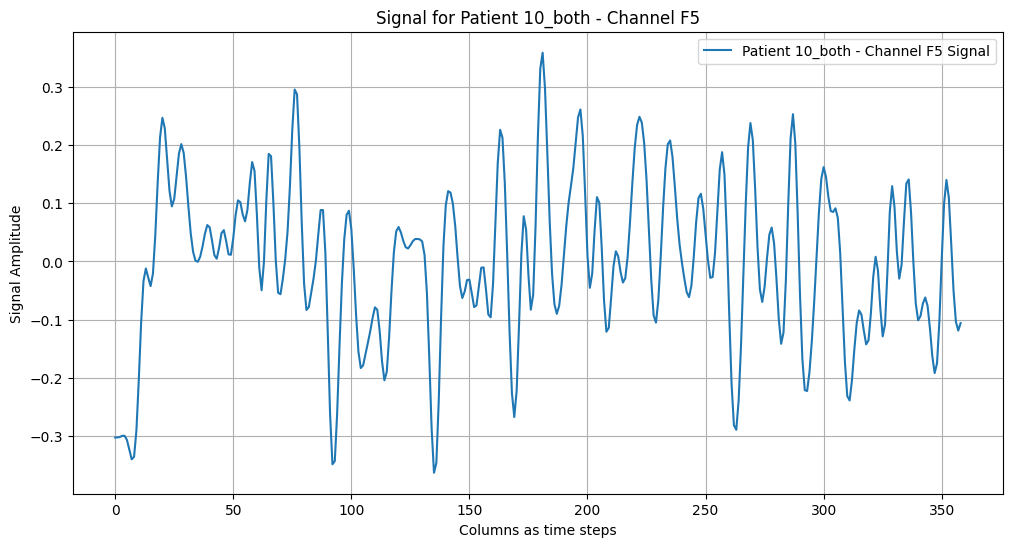

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/both'
output_dir = '/content/drive/MyDrive/mean1_both'

patient_files = [f for f in os.listdir(output_dir) if f.endswith('_mean_values.csv')]

channel_names = [
    "Fp1", "AF7", "AF3", "F1", "F3", "F5", "F7", "FT7", "FC5", "FC3", "FC1", "C1", "C3", "C5", "T7", "TP7", "CP5", "CP3", "CP1", "P1", "P3", "P5", "P7", "P9", "PO7", "PO3", "O1", "Oz", "POz", "Pz", "CPz", "Fpz", "Fp2", "AF8", "AF4", "AFz", "Fz", "F2", "F4", "F6", "F8", "FT8", "FC6", "FC4", "FC2", "FCz", "Cz", "C2", "C4", "C6", "T8", "TP8", "CP6", "CP4", "CP2", "P2", "P4", "P6", "P8", "P10", "PO8", "PO4", "O2"
]

selected_patient_id = input("Enter the patient ID (e.g., 1 for pilot1): ")
selected_channel = input("Enter the channel name to plot (e.g., Fp1): ")

file_name = f'pilot{selected_patient_id}_mean_values.csv'
file_path = os.path.join(output_dir, file_name)

if file_name in patient_files:
    data = pd.read_csv(file_path, header=None)

    if selected_channel in channel_names:
        channel_index = channel_names.index(selected_channel) + 1  # +1 because row 0 is time or metadata

        if channel_index < len(data):
            # Extract the selected row
            signal = data.iloc[channel_index].values


            plt.figure(figsize=(12, 6))
            plt.plot(signal, label=f'Patient {selected_patient_id}_both - Channel {selected_channel} Signal')
            plt.title(f'Signal for Patient {selected_patient_id}_both - Channel {selected_channel}')
            plt.xlabel('Columns as time steps')
            plt.ylabel('Signal Amplitude')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"Channel {selected_channel} does not exist in the file.")
    else:
        print(f"Channel {selected_channel} is not valid.")
else:
    print(f"File for Patient {selected_patient_id} does not exist.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the patient ID (e.g., 1 for pilot1): 10
Enter the channel name to plot (e.g., Fp1): F5


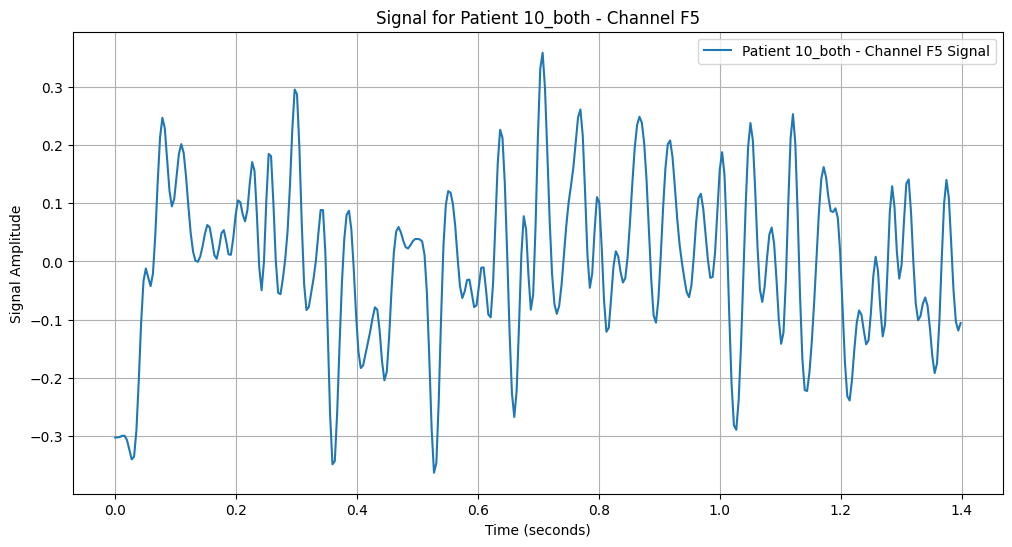

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/both'
output_dir = '/content/drive/MyDrive/mean1_both'

patient_files = [f for f in os.listdir(output_dir) if f.endswith('_mean_values.csv')]

channel_names = [
    "Fp1", "AF7", "AF3", "F1", "F3", "F5", "F7", "FT7", "FC5", "FC3", "FC1", "C1", "C3", "C5", "T7", "TP7", "CP5",
    "CP3", "CP1", "P1", "P3", "P5", "P7", "P9", "PO7", "PO3", "O1", "Oz", "POz", "Pz", "CPz", "Fpz", "Fp2", "AF8",
    "AF4", "AFz", "Fz", "F2", "F4", "F6", "F8", "FT8", "FC6", "FC4", "FC2", "FCz", "Cz", "C2", "C4", "C6", "T8",
    "TP8", "CP6", "CP4", "CP2", "P2", "P4", "P6", "P8", "P10", "PO8", "PO4", "O2"
]
selected_patient_id = input("Enter the patient ID (e.g., 1 for pilot1): ")
selected_channel = input("Enter the channel name to plot (e.g., Fp1): ")

file_name = f'pilot{selected_patient_id}_mean_values.csv'
file_path = os.path.join(output_dir, file_name)

if file_name in patient_files:
    data = pd.read_csv(file_path, header=None)

    if selected_channel in channel_names:
        channel_index = channel_names.index(selected_channel) + 1  # +1 because row 0 is time

        if channel_index < len(data):
            # Extract the selected row
            signal = data.iloc[channel_index].values

            # Calculate time points (in seconds)
            sample_rate = 256  # Hz
            num_samples = len(signal)
            time = [i / sample_rate for i in range(num_samples)]  # Generate time points

            plt.figure(figsize=(12, 6))
            plt.plot(time, signal, label=f'Patient {selected_patient_id}_both - Channel {selected_channel} Signal')
            plt.title(f'Signal for Patient {selected_patient_id}_both - Channel {selected_channel}')
            plt.xlabel('Time (seconds)')
            plt.ylabel('Signal Amplitude')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"Channel {selected_channel} does not exist in the file.")
    else:
        print(f"Channel {selected_channel} is not valid.")
else:
    print(f"File for Patient {selected_patient_id} does not exist.")

